# Exp 5: Integrated Experiment # 
## 1.	Aims ##

#### 1. Be familiar with the operations of morphological image processing. 

#### 2. Be familiar with the operations of image segmentation.
    
#### 3. Try to design GUI in Python.

## 2.	Steps and Requirements

### (1) Erosion, Dilation, Opening and Closing.	

(a) Load the RGB image clock2.jpg. Convert it to grayscale and then convert it into a binary image using a threshold of 0.5.

(b) Use an SE as [1 1 1; 1 1 1; 1 1 1] to obtain the binary morphological erosion, dilation, opening and closing of the binary image. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

(c) Use an SE as [1 0 0; 0 1 0; 0 0 1] to obtain the binary morphological erosion, dilation, opening and closing of the binary image. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

(d) Load the RGB image zebras.jpg. Convert it to grayscale. 

(e) Use a 3x3 SE to obtain the grayscale morphological erosion, dilation, opening and closing of grayscale image. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

(f) Use a 7x7 SE to obtain the grayscale morphological erosion, dilation, opening and closing of grayscale image. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

Hint:``skimage.morphology.binary_erosion``, ``skimage.morphology.binary_dilation``, ``skimage.morphology.binary_opening``, ``skimage.morphology.binary_closing``, ``skimage.morphology.erosion``, ``skimage.morphology.dilation``, ``skimage.morphology.opening`` and ``skimage.morphology.closing``

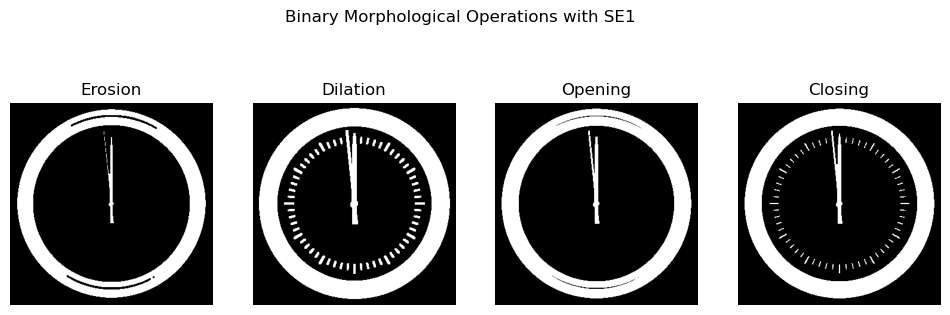

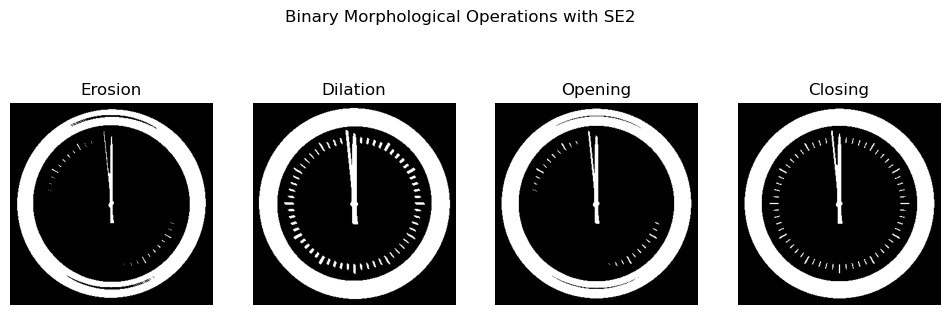

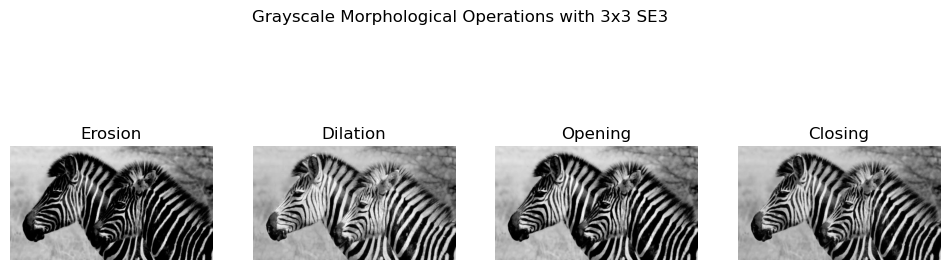

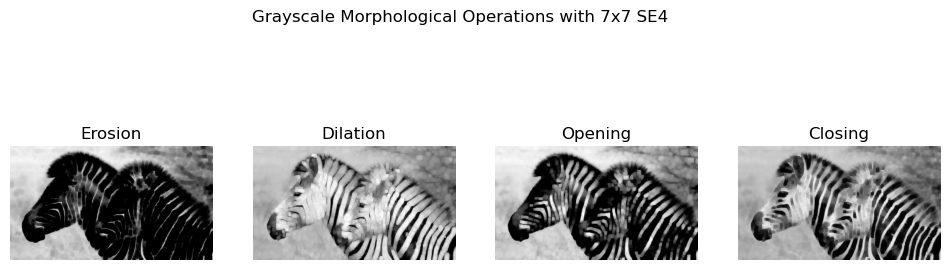

In [8]:
import matplotlib.pyplot as plt
from skimage import io, color, morphology
import numpy as np

def load_and_convert_to_binary(image_path, threshold = 0.5):
    # Load and convert image to grayscale
    image = io.imread(image_path)
    grayscale = color.rgb2gray(image)
    
    # Convert to binary image
    binary_image = grayscale > threshold
    return binary_image

def apply_morphological_operations(binary_image, se):
    # Apply binary morphological operations 
    erosion = morphology.binary_erosion(binary_image, se)
    dilation = morphology.binary_dilation(binary_image, se)
    opening = morphology.binary_opening(binary_image, se)
    closing = morphology.binary_closing(binary_image, se)
    return erosion, dilation, opening, closing

def display_results(images, titles, image_name):
    # Display results in a subplot
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.suptitle(image_name)
    plt.show()

# Part (a) and (b)
binary_image = load_and_convert_to_binary('clock2.jpg')
se1 = np.ones((3, 3), dtype=bool)
results = apply_morphological_operations(binary_image, se1)
titles = ['Erosion', 'Dilation', 'Opening', 'Closing']
display_results(results, titles, 'Binary Morphological Operations with SE1')

# Part (c)
se2 = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]], dtype=bool)
results = apply_morphological_operations(binary_image, se2)
display_results(results, titles, 'Binary Morphological Operations with SE2')

# Part (d) and (e)
grayscale_image = color.rgb2gray(io.imread('zebras.jpg'))
se3 = np.ones((3, 3), dtype=bool)
results = [
    morphology.erosion(grayscale_image, se3),
    morphology.dilation(grayscale_image, se3),
    morphology.opening(grayscale_image, se3),
    morphology.closing(grayscale_image, se3)
]
display_results(results, titles, 'Grayscale Morphological Operations with 3x3 SE3')

# Part (f)
se4 = np.ones((7,7), dtype=bool)
results = [
    morphology.erosion(grayscale_image, se4),
    morphology.dilation(grayscale_image, se4),
    morphology.opening(grayscale_image, se4),
    morphology.closing(grayscale_image, se4)
]
display_results(results, titles, 'Grayscale Morphological Operations with 7x7 SE4')

### (2) Boundary Extraction and Hole Filling

(a) Load the image boundary.tif. Convert it into a binary image.

(b) Use a 5x5 SE of 1s to obtain the binary morphological erosion of the binary image.

(c) Obtian the boundary of the binary image via performing the difference between the binary image and its erosion image.

(d) Load the image holefiling.tif. Convert it into a binary image.

(e) Fill the holes in binary objects. (Hine:``scipy.ndimage.binary_fill_holes``)

(f) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

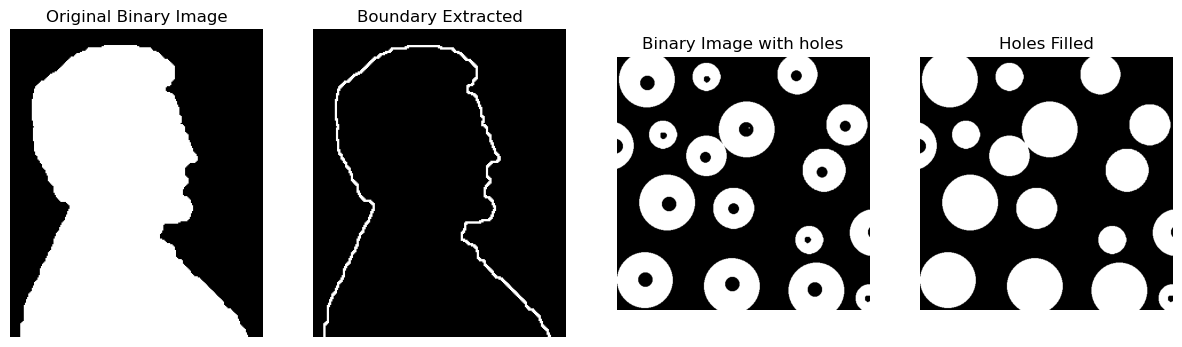

In [14]:
import matplotlib.pyplot as plt
from skimage import io, color, morphology
from scipy.ndimage import binary_fill_holes
import numpy as np
from PIL import Image

def load_and_convert_to_binary(image_path):
    # Load image by Pillow and convert to grayscale
    # The skimage.io.imread method cannot decode this TIFF  compression format.
    with Image.open(image_path) as img:
        img = img.convert('L')
    
    image_array = np.array(img)
    
    # Convert to binary image by thresholding
    binary_image = image_array > np.mean(image_array) # Threshold at mean value
    return binary_image

def extract_boundary(binary_image, se):
    # Perform erosion
    eroded_image = morphology.binary_erosion(binary_image, se)
    
    # Extract boundary by subtracting eroded image from the original binary image
    boundary = binary_image & ~eroded_image # Bitwise operators
    return boundary

def display_results(images, titles):
    # Display the images in a subplot
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Part (a) and (b)
binary_image = load_and_convert_to_binary('boundary.tif')
se = np.ones((5, 5), dtype=bool) # 5x5 structing element of 1s
boundary = extract_boundary(binary_image, se)

# Part (d) and (e)
binary_image_holes = load_and_convert_to_binary('holefiling.tif')
filled_image = binary_fill_holes(binary_image_holes)

# Part (f)
images = [binary_image, boundary, binary_image_holes, filled_image]
titles = ['Original Binary Image', 'Boundary Extracted', 'Binary Image with holes', 'Holes Filled']
display_results(images, titles)

### (3) Thining and Convex Hull
(a) Load the image CT.tif. Convert it into a binary image.

(b) Perform morphological thinning of a binary image. (Hint:``skimage.morphology.thin``, set the parameter of max_iter to 5, 50, and none, respectively.</font>)

(c) Compute the convex hull image of a binary image. (Hint:``skimage.morphology.convex_hull_image``)

(d) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

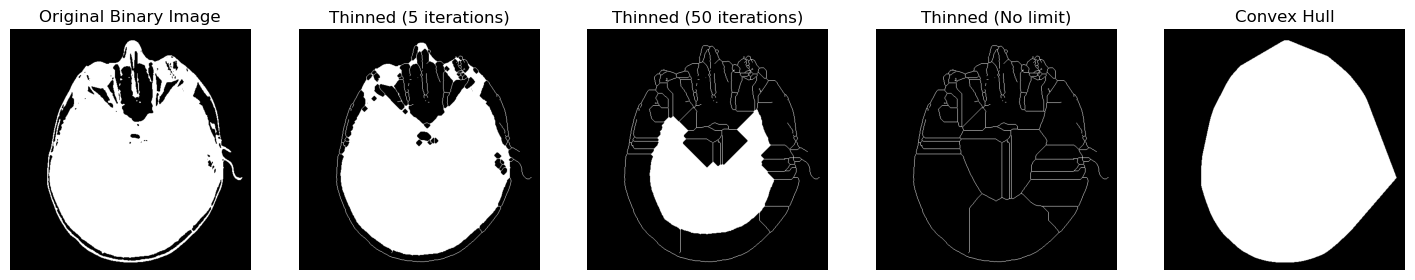

In [3]:
import matplotlib.pyplot as plt
from skimage import io, color, morphology
import numpy as np
from PIL import Image

def load_and_convert_to_binary(image_path):
    # Load image and convert to grayscale
    with Image.open(image_path) as img:
        img = img.convert('L') 
    
    image_array = np.array(img)
    
    # Convert to binary image by thresholding
    binary_image = image_array > np.mean(image_array)  # Threshold at mean value
    return binary_image

def perform_thinning(binary_image, max_num_iter):
    # Perform morphological thinning
    if max_num_iter is not None:
        thinned_image = morphology.thin(binary_image, max_num_iter=max_num_iter)
    else:
        thinned_image = morphology.thin(binary_image)
    return thinned_image

def compute_convex_hull(binary_image):
    # Compute convex hull
    convex_hull_image = morphology.convex_hull_image(binary_image)
    return convex_hull_image

def display_results(images, titles):
    # Display the images in a subplot
    fig, axes = plt.subplots(1, len(images), figsize=(18, 6))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Part (a)
binary_image = load_and_convert_to_binary('CT.tif')

# Part (b)
thinned_5 = perform_thinning(binary_image, 5)
thinned_50 = perform_thinning(binary_image, 50)
thinned_none = perform_thinning(binary_image, None)

# Part (c)
convex_hull = compute_convex_hull(binary_image)

# Part (d)
images = [binary_image, thinned_5, thinned_50, thinned_none, convex_hull]
titles = ['Original Binary Image', 'Thinned (5 iterations)', 'Thinned (50 iterations)', 'Thinned (No limit)', 'Convex Hull']
display_results(images, titles)

### (4) Top-hat (white top-hat) and Bottom-hat (black top-hat) Transformation

(a) Load the grayscale image rice.tif. Convert it into a binary image with a threshold of 0.5.

(b) Perform top-hat transformation to the grayscale image. (Hint:``skimage.morphology.white_tophat``, set the parameter of footprint to ``skimage.morphology.square(81)``)

(c) Obtain thresholded top-hat image and convert it into a binary image.

(d) Perform bottom-hat transformation to the grayscale image. (Hint:``skimage.morphology.black_tophat``, set the parameter of footprint to ``skimage.morphology.square(81)``)

(e) Obtain thresholded bottom-hat image and convert it into a binary image.

(f) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.


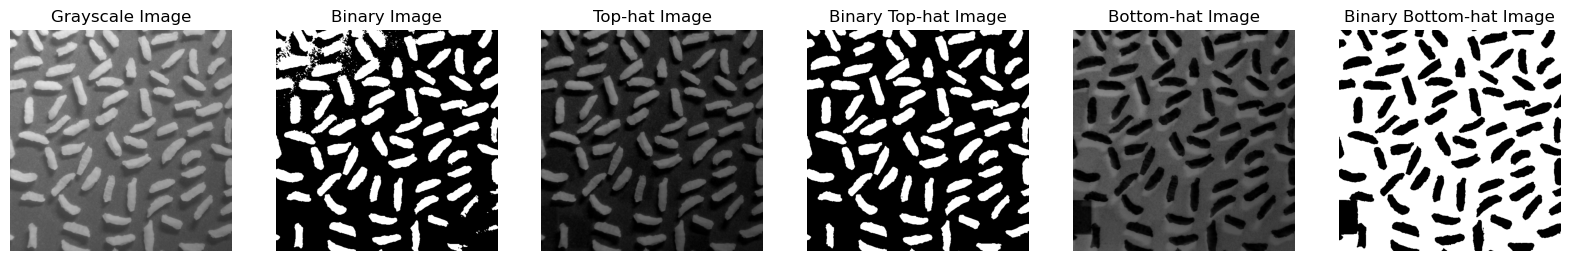

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, filters

def load_image(image_path):
    # Open an image file
    with Image.open(image_path) as img:
        # Convert image to grayscale
        grayscale = img.convert('L')
    return np.array(grayscale, dtype=np.uint8)

def convert_to_binary(image, threshold):
    # Normalize image to range [0, 1]
    normalized_image = image / 255
    # Convert image to binary
    return normalized_image > threshold

def display_results(images, titles):
    # Display images in a subplot
    fig, axes = plt.subplots(1, len(images), figsize=(20, 5))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray', vmin=0, vmax=1)
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Load the grayscale image
grayscale_image = load_image('rice.tif')  # Update this path
# Convert the grayscale image to binary with a threshold of 0.5
binary_image = convert_to_binary(grayscale_image, 0.5)

# Set the footprint for morphological operations
footprint = morphology.square(81)

# Perform top-hat and bottom-hat transformations
tophat_image = morphology.white_tophat(grayscale_image, footprint)
bottomhat_image = morphology.black_tophat(grayscale_image, footprint)

# Convert transformed images to binary
binary_tophat_image = convert_to_binary(tophat_image, filters.threshold_otsu(tophat_image) / 255)
binary_bottomhat_image = convert_to_binary(bottomhat_image, filters.threshold_otsu(bottomhat_image) / 255)

# Display results
images = [grayscale_image / 255, binary_image, tophat_image / 255, binary_tophat_image, bottomhat_image / 255, binary_bottomhat_image]
titles = ['Grayscale Image', 'Binary Image', 'Top-hat Image', 'Binary Top-hat Image', 'Bottom-hat Image', 'Binary Bottom-hat Image']
display_results(images, titles)


### (5) Edge Detection
(a) Load the image building.tif. 

(b) Find edges in an image using the Roberts' cross operators, Sobel operators, Prewitt operators, and the Canny algorithm. (Hint:``skimage.filters.roberts``, ``skimage.filters.sobel``,  ``skimage.filters.prewitt``, ``skimage.feature.canny``)

(c) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

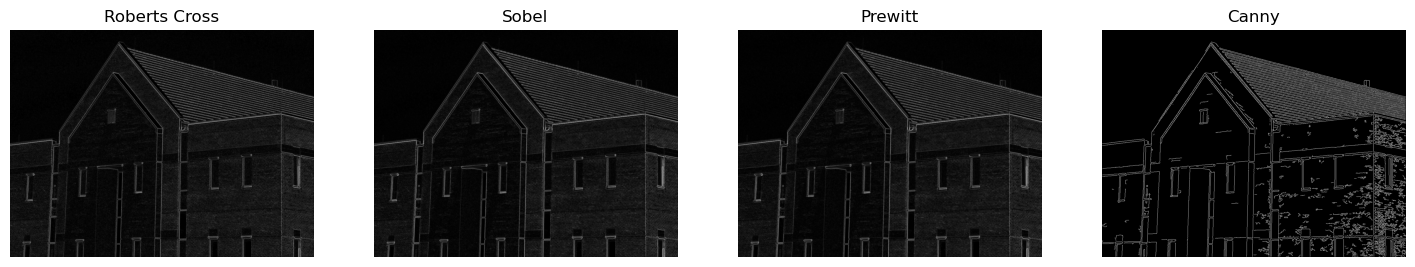

In [5]:
import matplotlib.pyplot as plt
from skimage import filters, feature
import numpy as np
from PIL import Image

def load_image(image_path):
    # Open an image file
    with Image.open(image_path) as img:
        # Convert image to grayscale
        grayscale = img.convert('L')
    return np.array(grayscale)

def apply_edge_detection(grayscale_image):
     # Apply Roberts, Sobel, Prewitt, and Canny edge detection
    edges_roberts = filters.roberts(grayscale_image)
    edges_sobel = filters.sobel(grayscale_image)
    edges_prewitt = filters.prewitt(grayscale_image)
    edges_canny = feature.canny(grayscale_image, sigma=1.5)
    return edges_roberts, edges_sobel, edges_prewitt, edges_canny

def display_results(images, titles):
    # Display images in a subplot
    fig, axes = plt.subplots(1, len(images), figsize=(18, 5))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Load the grayscale image
grayscale_image = load_image('building.tif')

# Get the edge detections
edges_roberts, edges_sobel, edges_prewitt, edges_canny = apply_edge_detection(grayscale_image)

# Disaplay results
images = [edges_roberts, edges_sobel, edges_prewitt, edges_canny]
title = ['Roberts Cross', 'Sobel', 'Prewitt', 'Canny']
display_results(images, titles)

### (6) Edge-Based Segmentation
(a) Load the coins image in skimage. (Hint:``skimage.data.coins()``)

(b) Use Canny algorithm to obtain the edge image. (Hint:``skimage.feature.canny``, set the parameter of sigma to 3)

(c) Fill the holes to obtain the segmented image. (Hint:``scipy.ndimage.binary_fill_holes``)

(c) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.

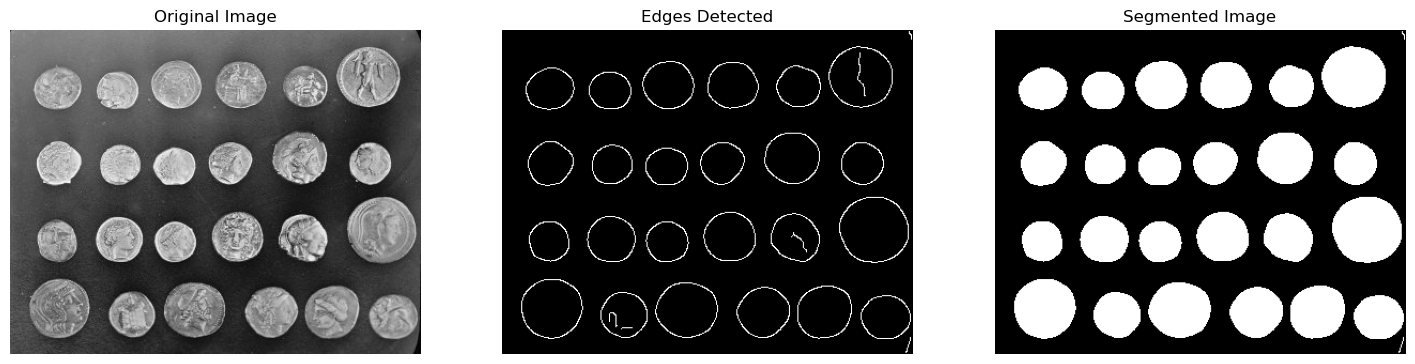

In [6]:
import matplotlib.pyplot as plt
from skimage import data, feature
from scipy.ndimage import binary_fill_holes

def display_results(images, titles):
    # Display images in a subplot
    fig, axes = plt.subplots(1, len(images), figsize=(18, 6))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Load the coins image
image = data.coins()

# Edge detection
edges = feature.canny(image, sigma=3)

# Fill holes to obtain segmented image
segmented_image = binary_fill_holes(edges)

# Disaplay results
images = [image, edges, segmented_image]
titles = ['Original Image', 'Edges Detected', 'Segmented Image']
display_results(images, titles)


### (7) Hough transform
(a) Load the image triangle_circle.png. Convert it to grayscale.

(b) Perform a straight line Hough transform to the grayscale image. (Hint:``skimage.transform.hough_line``)

(c) Obtain the peaks in a straight line Hough transform. (Hint:``skimage.transform.hough_line_peaks``)

(d) Highlight the detected lines by red color. (Hint:``matplotlib.pyplot.axline``)

(e) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.



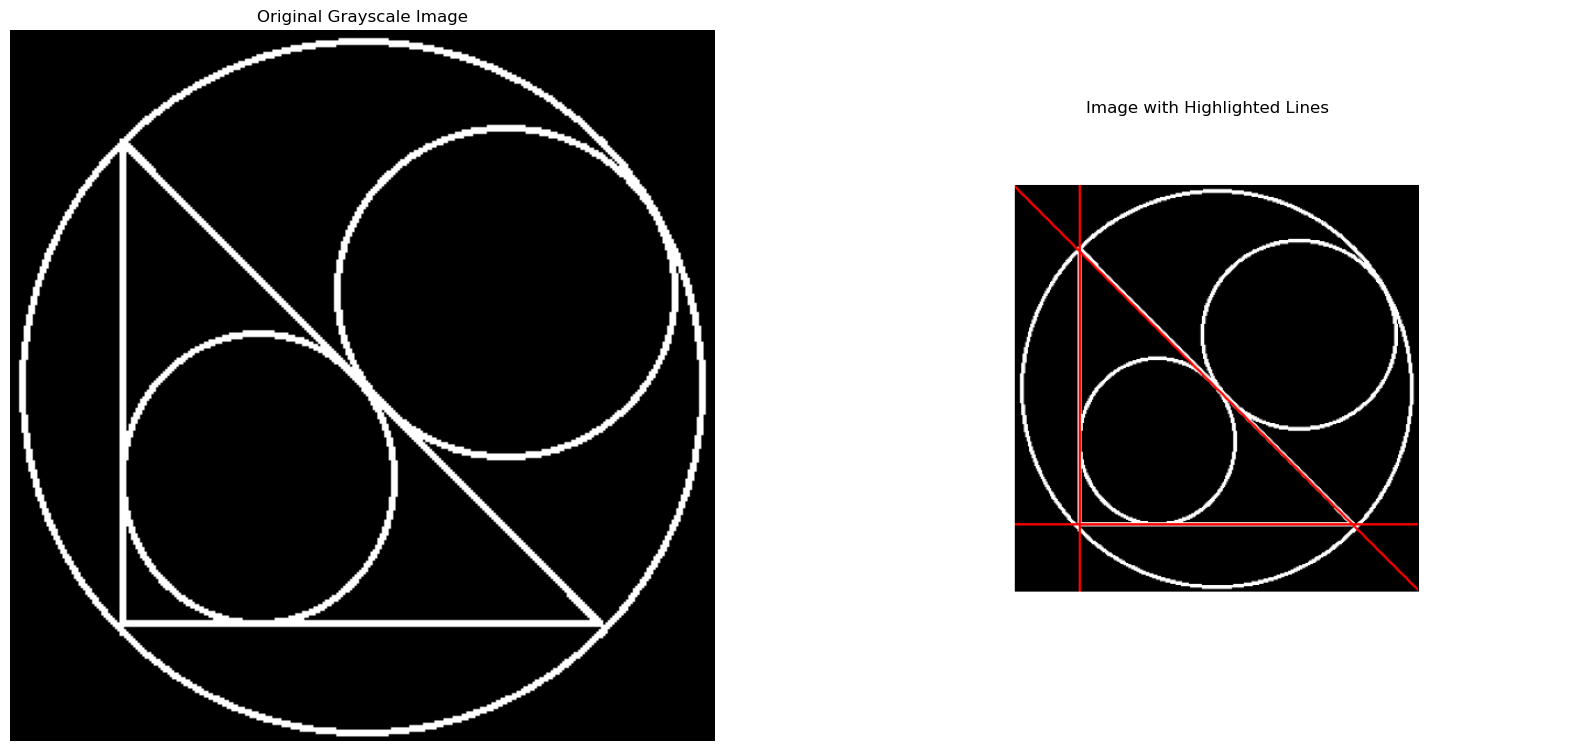

In [13]:
import matplotlib.pyplot as plt
from skimage import io, color, transform
import numpy as np

def highlight_lines(image, peaks, angles, distances):
    # Create a color image to draw lines
    if len(image.shape) == 2:  # Check if the image is grayscale
        image_with_lines = np.dstack([image] * 3)  # Convert to RGB
    else:
        image_with_lines = np.copy(image)

    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray', extent=[0, image.shape[1], image.shape[0], 0])

    for _, angle, dist in zip(*peaks):
        if np.sin(angle) == 0:  # Check for vertical lines
            x = dist / np.cos(angle)  # x-coordinate of the vertical line
            ax.axvline(x, color='red')  # Use axvline to draw vertical line
        else:
            y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
            y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
            ax.plot((0, image.shape[1]), (y0, y1), '-r')

    plt.axis('off')
    plt.close(fig)  # Close the plot to prevent it from showing now

    # Capture the plot as an image
    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return data

def display_results(images, titles):
    # Display images in a subplot
    fig, axes = plt.subplots(1, len(images), figsize=(20, 10))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Load the grayscale image
image_path = 'triangle_circle.png'  # Adjust to your image path
image = io.imread(image_path)
if image.ndim == 3 and image.shape[2] == 4:  # Handle PNG format's RGBA problem
    image = image[..., :3]
grayscale_image = color.rgb2gray(image)

# Apply Hough transform
hough_space, angles, distances = transform.hough_line(grayscale_image)

# Obtain peaks in the Hough transform
peaks = transform.hough_line_peaks(hough_space, angles, distances)

# Highlight detected lines
image_with_lines = highlight_lines(grayscale_image, peaks, angles, distances)

# Display results
images = [grayscale_image, image_with_lines]
titles = ['Original Grayscale Image', 'Image with Highlighted Lines']
display_results(images, titles)


### (8) Thresholding-Based Segmentation 
(a) Load the image shade_text1.tif. 

(b) Perform automatic image thresholding by Otsu's method to get the threshold value. (Hint:``skimage.filters.threshold_otsu``)

(c) Transform the grayscale image into a binary image using the threshold value obtained by Otsu's method.

(d) Compute a moving average threshold. (Hint:``cv2.blur``)

(e) Obtain the result of local thresholding using moving averages.

(f) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

Otsu's Threshold: 136


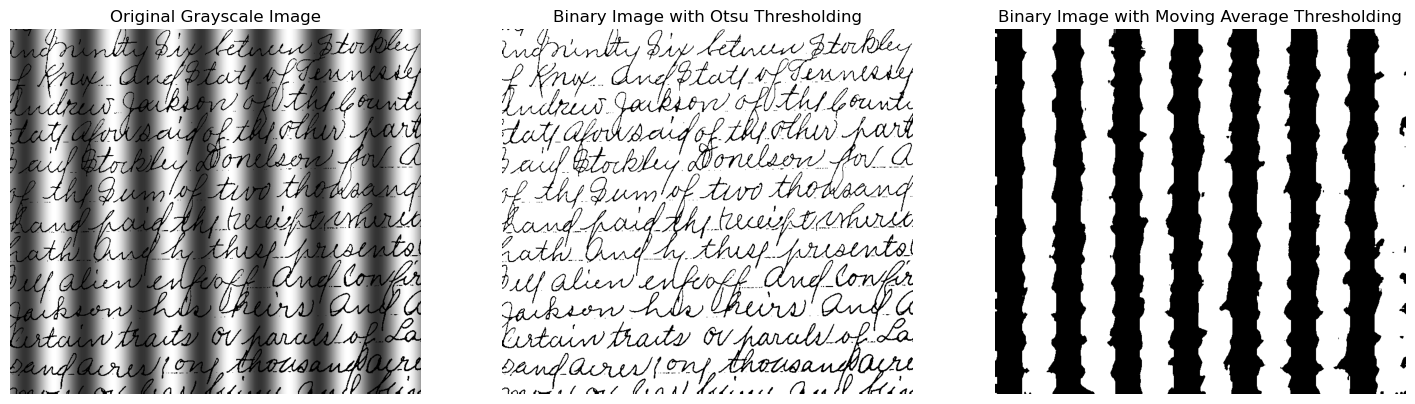

In [36]:
import matplotlib.pyplot as plt
from skimage import io, color, filters
import cv2
import numpy as np

def display_reults(images, titles):
    # Dispaly images in a subplot
    fig, axes = plt.subplots(1, len(images), figsize=(18, 6))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Load and prepare the image
with Image.open('shade_text1.tif') as img:
# Convert image to grayscale
    grayscale_image= np.array(img.convert('L'))
    
# Perform thresholding using Otsu's method
otsu_threshold = filters.threshold_otsu(grayscale_image)
binary_otsu = grayscale_image > threshold
print("Otsu's Threshold:", otsu_threshold)

# Perform local thresholding using moving averages
blurred_image = cv2.blur(grayscale_image, (15, 15))
binary_local = blurred_image > 0.5 * 255

# Display the results
images = [grayscale_image, binary_otsu, binary_local]
titles = ['Original Grayscale Image', 'Binary Image with Otsu Thresholding', 'Binary Image with Moving Average Thresholding']
display_results(images, titles)

### (9) Image Processing Software with GUI

* Use QT or other tools to design an image processing toolbox with GUI. There is no limitation on implementations. 

* The GUI contain at least one basic image processing function, can it can display the input image and the processed image.

* <font color=Blue>Submit a video recording to demonstrate the function of your GUI design in your report.</font>

## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.